    4     3     2
-2 x + 2 x - 4 x - 10 x + 200
Starting interval:[ -2  ,  4 ]
Error tolerance: 0.001
Numer of iterations : 7
Root found: 3.109375
Elapsed time: 0.015625


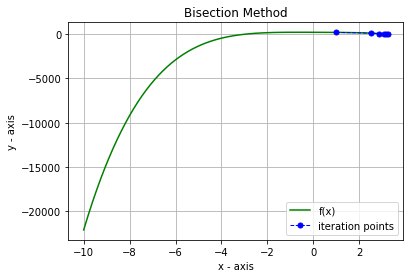

In [72]:
from scipy import poly1d
import numpy as np
import matplotlib.pyplot as plt
import time
import math
import plotly.graph_objects as go

# a = lower bound of the iteration
# b = upper bound of the iteration
# f = non-linear equation
# error = absolute tolerance
# n = number of iterations


def bisection(a,b,f,error):
    
    print(f)
    print("Starting interval:[",a, " , ",b,"]")
    print("Error tolerance:",error)
      
    #plotting the fuction graph
    pol_x = np.arange(-10,3,0.01)
    pol_y = f(pol_x)
    plt.plot(pol_x, pol_y, 'g' , label = "f(x)")
    plt.xlabel('x - axis') 
    plt.ylabel('y - axis')   
    plt.title('Bisection Method')       
    plt.grid(True)
    
    x = []
    y = []
    
    n = 1
    if f(a)*f(b) >= 0:
        print("These interval points can't be used")
        return None
    
    while((b-a)/(2**n) > error):
        
        mean = (a+b)/2
        
        #saving the iterations
        x.append(mean)
        y.append(f(mean))
        
        if f(mean)*f(a) < 0:
            b = mean
        elif f(mean)*f(b) < 0:
            a = mean
        elif f(mean) == 0:
            print("Found exact solution")
            return f(mean)
        else:
            print("Method failed")
            return None
        
        n += 1
        
    print("Numer of iterations :", n)
    
    #marking the iterations
    plt.plot(x, y,color='blue',linestyle='dashed', linewidth = 1, marker= "o" , markerfacecolor='blue', markersize=5, label = "iteration points")
    plt.legend()
    return (a+b)/2

t = time.process_time()

#generating a polynomial function
polynom = poly1d([-2,2,-4,-10,200])

print("Root found:",bisection(-2,4,polynom,10**-3))

#time measure
elapsed_time = time.process_time() - t

print("Elapsed time:",elapsed_time)



   6     5     4     2
1 x - 1 x - 6 x - 1 x + 1 x + 10
Taking derivative:
   5     4      3
6 x - 5 x - 24 x - 2 x + 1
Starting point: -3
Error tolerance: 0.001
Numer of iterations : 7
Root found: -1.9382288406304586
Elapsed time: 0.015625


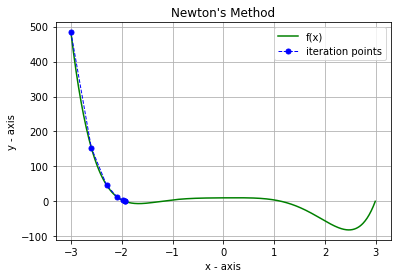

In [5]:
from scipy import poly1d
import numpy as np
import matplotlib.pyplot as plt
import time
import math
import plotly.graph_objects as go

# a = initial point
# xn = next itaration point
# fx = next iteration value
# f = non-linear equation
# deriv = derivative of f
# error = absolute tolerance
# n = number of iterations

def newton(a,f,error):
    
    print(f)
    deriv = f.deriv()
    print("Taking derivative:")
    print(deriv)
    print("Starting point:",a)
    print("Error tolerance:",error)
    
    #plotting the fuction graph
    pol_x = np.arange(-3,3,0.01)
    pol_y = f(pol_x)
    plt.plot(pol_x, pol_y, 'g' , label = "f(x)")
    plt.xlabel('x - axis') 
    plt.ylabel('y - axis')   
    plt.title("Newton's Method")       
    plt.grid(True)
    
    x = []
    y = []
    
    n = 1
    xn = a
    
    while(True):
        fx = f(xn)

        #saving the iterations
        x.append(xn)
        y.append(fx)
        deriv_xn = deriv(xn)

        if deriv_xn == 0:
            print("No solution found")
            return None
        
        old = xn
        xn = xn - (fx/deriv_xn)
        err = abs(xn - old)
        if (err < error):
            break
        n += 1
        
        
    print("Numer of iterations :", n)
    
    #marking the iterations
    plt.plot(x, y,color='blue',linestyle='dashed', linewidth = 1, marker= "o" , markerfacecolor='blue', markersize=5, label = "iteration points")
    plt.legend()
    return xn

t = time.process_time()

#generating a polynomial function
polynom = poly1d([1,-1,-6,0,-1,1,10])

print("Root found:",newton(-3,polynom,10**-3))

#time measure
elapsed_time = time.process_time() - t

print("Elapsed time:",elapsed_time)



    4     3
-1 x + 2 x
Starting interval:[ -0.5  ,  1.5 ]
Error tolerance: 0.001
Numer of iterations : 33
Root found: -0.07840281105328663
Elapsed time: 0.015625


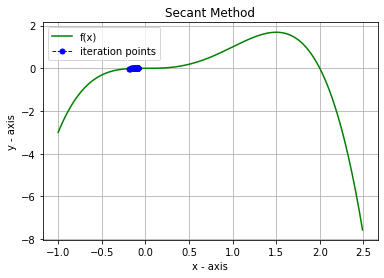

In [4]:
from scipy import poly1d
import numpy as np
import matplotlib.pyplot as plt
import time
import math
import plotly.graph_objects as go

# a = lower bound of the iteration
# b = upper bound of the iteration
# xn = next iteration point
# old = previous iteration to calculate error
# f = non-linear equation
# error = absolute tolerance
# n = number of iterations


def secant(a,b,f,error):
    
    print(f)
    print("Starting interval:[",a, " , ",b,"]")
    print("Error tolerance:",error)
      
    #plotting the fuction graph
    pol_x = np.arange(-1,2.5,0.01)
    pol_y = f(pol_x)
    plt.plot(pol_x, pol_y, 'g' , label = "f(x)")
    plt.xlabel('x - axis') 
    plt.ylabel('y - axis')   
    plt.title('Secant Method')       
    plt.grid(True)
    
    x = []
    y = []
    
    n = 1
    
    if f(a)*f(b) >= 0:
        print("These interval points can't be used")
        return None
    
    
    while(True):
        old = a
        xn = a - f(a)*(b-a)/(f(b) - f(a)) 
        err = abs(xn - old)
        if (err < error):
            break
            
        #saving the iterations
        x.append(xn)
        y.append(f(xn))
        
        if f(xn)*f(a) < 0:
            a = a
            b = xn
        elif f(xn)*f(b) < 0:
            a = xn
            b = b
        elif f(xn) == 0:
            print("Found exact solution")
            return xn
        else:
            print("Method failed")
            return None
        
        n += 1
        
    print("Numer of iterations :", n)
    
    #marking the iterations
    plt.plot(x, y,color='blue',linestyle='dashed', linewidth = 1, marker= "o" , markerfacecolor='blue', markersize=5, label = "iteration points")
    plt.legend()
    return a - f(a)*(b - a)/(f(b) - f(a))

t = time.process_time()

#generating a polynomial function
polynom = poly1d([-1,2,0,0,0])
print("Root found:",secant(-0.5,1.5,polynom,10**-3))

#time measure
elapsed_time = time.process_time() - t

print("Elapsed time:",elapsed_time)



   3     2
1 x - 6 x + 11 x - 6
Leaving x alone:
          3          2
-0.09091 x + 0.5455 x + 0.5455
Starting point: 1.9
Error tolerance: 0.001
Numer of iterations : 61
Root found: 1.0004892909783027
Elapsed time: 0.03125


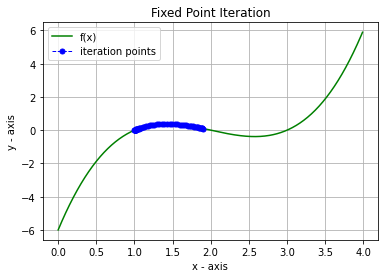

In [16]:
from scipy import poly1d
import numpy as np
import matplotlib.pyplot as plt
import time
import math
import plotly.graph_objects as go

# xn = starting point
# f = non-linear equation
# g = rewriting f(x)=0 to x = g(x)
# error = absolute tolerance
# n = number of iterations


def fixed(xn,f,g,error):
    
    print(f)
    print("Leaving x alone:")
    print(g)
    print("Starting point:",xn)
    print("Error tolerance:",error)
      
    #plotting the fuction graph
    pol_x = np.arange(0,4,0.01)
    pol_y = f(pol_x)
    plt.plot(pol_x, pol_y, 'g' , label = "f(x)")
    plt.xlabel('x - axis') 
    plt.ylabel('y - axis')   
    plt.title('Fixed Point Iteration')       
    plt.grid(True)
    
    x = []
    y = []
    
    n = 1
    
    while(True): 
            
        #saving the iterations
        x.append(xn)
        y.append(f(xn))
        
        g_x = g(xn)
        
        xn = g_x
        
        if (abs(f(g_x)) < error):
            break
            
        n += 1
        
    print("Numer of iterations :", n)
    
    #marking the iterations
    plt.plot(x, y,color='blue',linestyle='dashed', linewidth = 1, marker= "o" , markerfacecolor='blue', markersize=5, label = "iteration points")
    plt.legend()
    return g_x

t = time.process_time()

#generating a polynomial function
polynom = poly1d([1,-6,11,-6])
g = poly1d([-1/11, 6/11, 0, 6/11])
print("Root found:",fixed(1.9,polynom,g,10**-3))

#time measure
elapsed_time = time.process_time() - t

print("Elapsed time:",elapsed_time)

